<a href="https://colab.research.google.com/github/adityasahusomu/Youtube_Comment_Analyzer/blob/main/Youtube_Comment_Analyzer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/Himanshu-1703/reddit-sentiment-analysis/refs/heads/main/data/reddit.csv')
df.head()

,clean_comment,category
0,family mormon have never tried explain them t...,1
1,buddhism has very much lot compatible with chr...,1
2,seriously don say thing first all they won get...,-1
3,what you have learned yours and only yours wha...,0
4,for your own benefit you may want read living ...,1


In [3]:
df.shape

(37249, 2)

In [4]:
df.sample()['clean_comment'].values

array(['lets say modi has attributes abcxyz people who like him like him for abcx people who don like him and despise him lot for cxyz that people who like him like him for different reasons than the reasons for which people hate him this why the whole confusion and cacophony opinions when person who trying understand the landscape modi has huge popularity among nris and india which don really understand why his abc characteristics for which liked much his supporters are his economic and growth policies and his pro hindutva ala pat robertson bill reilly style christian conservatism political stance his xyz characteristics for which hated much his opponents his association with gujarat riots during 2002 his state suffered through terrible riots between hindus and muslims triggered train full hindu pilgrims allegedly burned muslim mob resulted state wide backlash against muslims and about 1000 muslims died and many many more were displaced india has had his own share riots and usually th

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37249 entries, 0 to 37248
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   clean_comment  37149 non-null  object
 1   category       37249 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 582.1+ KB


In [6]:
df.isnull().sum()

,0
clean_comment,100
category,0


In [7]:
df[df['clean_comment'].isna()]['category'].value_counts()

,count
category,
0,100


In [8]:
df.dropna(inplace=True)

In [9]:
df.duplicated().sum()

np.int64(350)

In [10]:
df.drop_duplicates(inplace=True)

In [11]:
df.duplicated().sum()

np.int64(0)

In [13]:
df[(df['clean_comment'].str.strip()=='')]

,clean_comment,category
181,,0
4432,\n,0
10592,,0
16173,,0
32149,\n,0
34959,,0


In [14]:
df = df[~(df['clean_comment'].str.strip() == '')]

In [16]:
df['clean_comment'] = df['clean_comment'].str.lower()
df.head()

,clean_comment,category
0,family mormon have never tried explain them t...,1
1,buddhism has very much lot compatible with chr...,1
2,seriously don say thing first all they won get...,-1
3,what you have learned yours and only yours wha...,0
4,for your own benefit you may want read living ...,1


In [30]:
df[df['clean_comment'].apply(lambda x: x.endswith(' ') or x.startswith(' '))]

,clean_comment,category
0,family mormon have never tried explain them t...,1
1,buddhism has very much lot compatible with chr...,1
2,seriously don say thing first all they won get...,-1
3,what you have learned yours and only yours wha...,0
4,for your own benefit you may want read living ...,1
...,...,...
37241,let the janta decide not ulema clerics,0
37242,hona hai same with vaccination education insu...,0
37246,downvote karna tha par upvote hogaya,0
37247,haha nice,1


In [32]:
df['clean_comment'] = df['clean_comment'].str.strip()

df['clean_comment'].apply(lambda x: x.endswith(' ') or x.startswith(' ')).sum()

np.int64(0)

In [33]:
# Identify comments containing URLs
url_pattern = r'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\\(\\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+'
comments_with_urls = df[df['clean_comment'].str.contains(url_pattern, regex=True)]


In [34]:
comments_with_urls

,clean_comment,category


In [35]:
comments_with_newline = df[df['clean_comment'].str.contains('\n')]
comments_with_newline

,clean_comment,category
448,what missing jpg\nand why this brilliant edit ...,1
781,india has been ruined congress and populist sc...,-1
847,like aap for its stand corruption and making p...,-1
871,reduced trade\ndeficit stronger rupee aren the...,0
1354,amsa press conference australian maritime safe...,1
...,...,...
35128,火箭o辛基 2016 sughosh bansal mission “make india”...,-1
35230,yikes the title should blind bhakts modi hater...,1
36187,hahahahahhahahah \niska klpd hogya,0
36517,्ा् ी ाी े ो ेी ाी े।\nे ी,0


In [36]:
df['clean_comment'] = df['clean_comment'].str.replace('\n', ' ', regex = True)

In [37]:
comments_with_newline_remaining = df[df['clean_comment'].str.contains('\n')]
comments_with_newline_remaining

,clean_comment,category


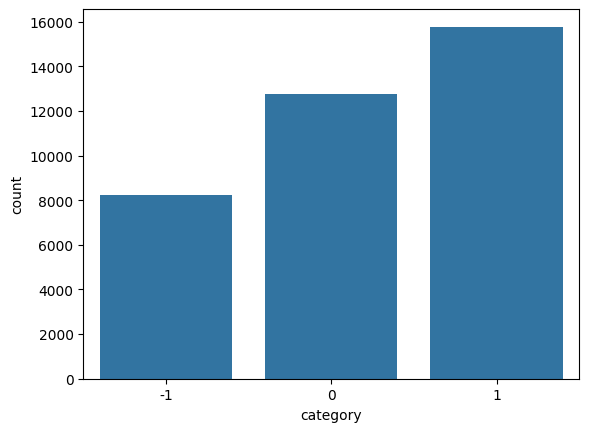

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data = df, x = 'category')
plt.show()

In [40]:
df['category'].value_counts(normalize=True).mul(100).round(2)

,proportion
category,
1,42.86
0,34.71
-1,22.42


In [42]:
df['word_count'] = df['clean_comment'].apply(lambda x: len(x.split()))
df

,clean_comment,category,word_count
0,family mormon have never tried explain them th...,1,39
1,buddhism has very much lot compatible with chr...,1,196
2,seriously don say thing first all they won get...,-1,86
3,what you have learned yours and only yours wha...,0,29
4,for your own benefit you may want read living ...,1,112
...,...,...,...
37244,jesus,0,1
37245,kya bhai pure saal chutiya banaya modi aur jab...,1,19
37246,downvote karna tha par upvote hogaya,0,6
37247,haha nice,1,2


In [43]:
df.describe()

,category,word_count
count,36793.000000,36793.000000
mean,0.204414,29.667464
std,0.781729,56.790738
min,-1.000000,1.000000
25%,0.000000,6.000000
50%,0.000000,13.000000
75%,1.000000,30.000000
max,1.000000,1307.000000


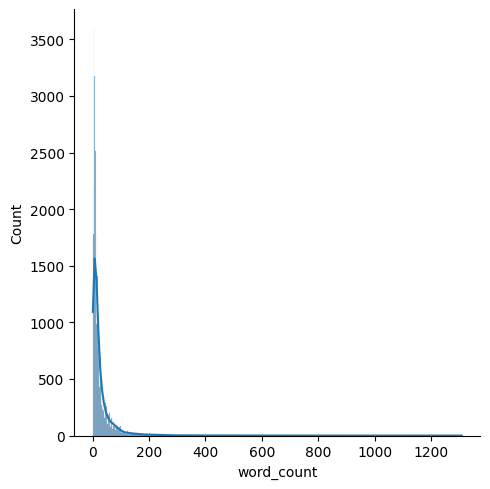

In [46]:
sns.displot(df['word_count'], kde = True)

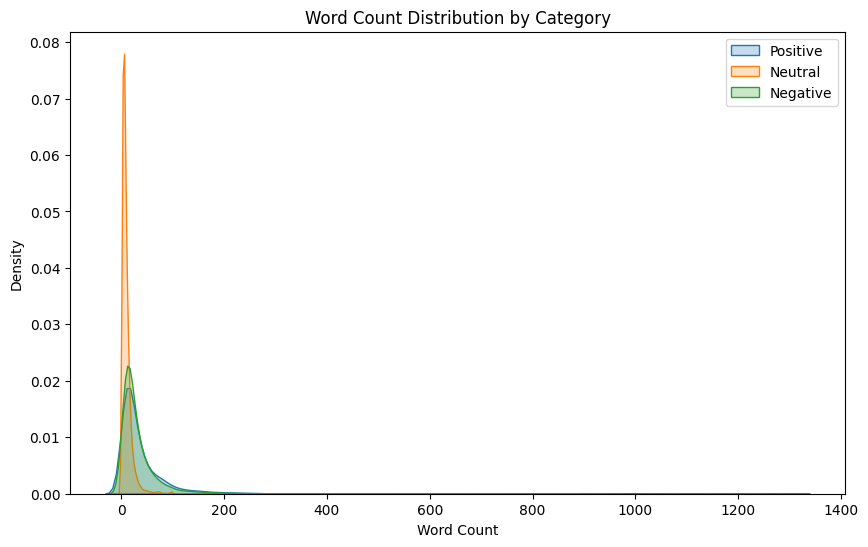

In [47]:
plt.figure(figsize=(10, 6))

#KDE for category 1
sns.kdeplot(df[df['category'] == 1]['word_count'], label='Positive', fill=True)

#KDE for category 0
sns.kdeplot(df[df['category'] == 0]['word_count'], label='Neutral', fill=True)

#KDE for category -1
sns.kdeplot(df[df['category'] == -1]['word_count'], label='Negative', fill=True)

plt.title('Word Count Distribution by Category')
plt.xlabel('Word Count')
plt.ylabel('Density')

plt.legend()
plt.show()

*   Positive comments (category 1): These tend to have a wider spread in word count, indicating that longer comments are more common in positive sentiments.

*   Neutral comments (category 0): The distribution shows a relatively lower frequency and is more concentrated around shorter comments compared to positive or negative ones.

*   Negative comments (category -1): These comments have a distribution somewhat similar to positive comments but with a smaller proportion of longer comments.







<Axes: ylabel='word_count'>

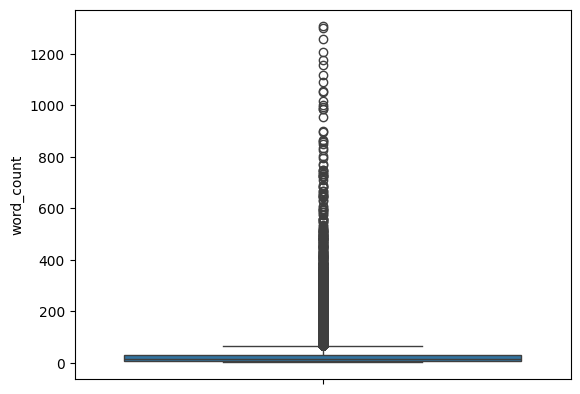

In [48]:
sns.boxplot(df['word_count'])

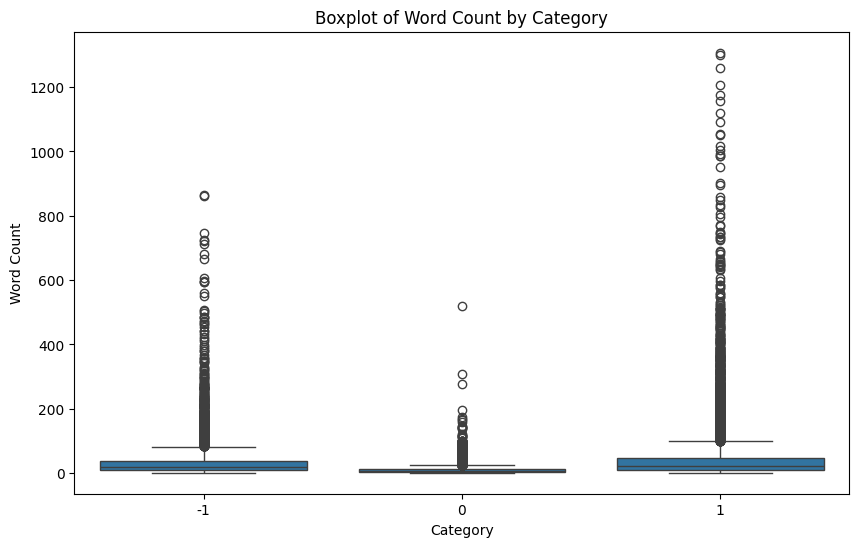

In [49]:
# Create a boxplot for the 'wordcount' column categorized by 'category'
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='category', y='word_count')
plt.title('Boxplot of Word Count by Category')
plt.xlabel('Category')
plt.ylabel('Word Count')
plt.show()

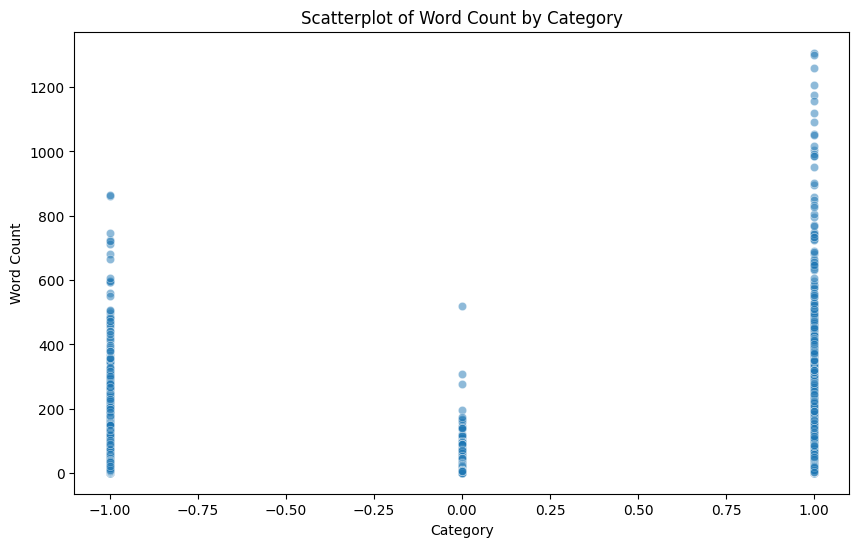

In [54]:
# Create a scatterplot between 'category' and 'wordcount'
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='category', y='word_count', alpha=0.5)
plt.title('Scatterplot of Word Count by Category')
plt.xlabel('Category')
plt.ylabel('Word Count')
plt.show()

<Axes: xlabel='category', ylabel='word_count'>

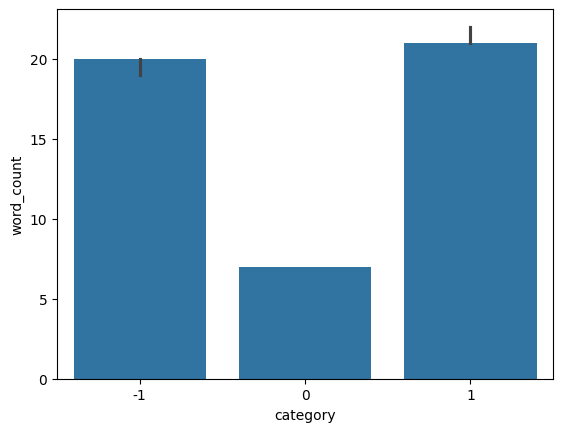

In [61]:
# median word counts among sentiments

sns.barplot(df,x='category',y='word_count',estimator='median')

NLP related Preprocessing